# Visualising the Renewable Energy of Europe

The goal of this project will be to examine the possibility of renewable energy rising to match consumption within the coming years as well as if renewables have a direct effect on the price of energy. The country that will be studying is Germany because the transparent nature of the OPSD (Open Power Systems Data). We will begin by isolating German data from the whole European database. 



### Cleaning the Data

In the first step in the process we must pull the relevant data from our given dataframe. Then we will need to group the twenty four hour periods that are given into days. Handling each value will be difficult given the price's realatively unchanging hourly nature and all others being given over hourly increments. 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df=pd.read_csv("time_series_60min_singleindex.csv")

In [3]:
de=[]
for col in list(df.columns):
    if "DE" in col:
        de.append(col)

In [4]:
time=df.copy()['cet_cest_timestamp']
germany=df.copy()[de]

DE=pd.concat([time, germany], axis=1)

DE.fillna(0, inplace=True)

Index(['cet_cest_timestamp', 'DE_load_actual_entsoe_power_statistics',
       'DE_load_actual_entsoe_transparency',
       'DE_load_forecast_entsoe_transparency', 'DE_price_day_ahead',
       'DE_solar_capacity', 'DE_solar_generation_actual', 'DE_solar_profile',
       'DE_wind_capacity', 'DE_wind_generation_actual', 'DE_wind_profile',
       'DE_wind_offshore_capacity', 'DE_wind_offshore_generation_actual',
       'DE_wind_offshore_profile', 'DE_wind_onshore_capacity',
       'DE_wind_onshore_generation_actual', 'DE_wind_onshore_profile',
       'DE_50hertz_load_actual_entsoe_transparency',
       'DE_50hertz_load_forecast_entsoe_transparency',
       'DE_50hertz_solar_generation_actual',
       'DE_50hertz_solar_generation_forecast',
       'DE_50hertz_wind_generation_actual',
       'DE_50hertz_wind_generation_forecast',
       'DE_50hertz_wind_offshore_generation_actual',
       'DE_50hertz_wind_onshore_generation_actual',
       'DE_50hertz_wind_onshore_generation_forecast',
     

We need to match our dataframes' time values,one is daily and the other is hourly. In order to do this, we will remove the additionaly hour time stamps and aggregate based on the average of each value for the given date. 

In [5]:
def time_fix(time): #first 10
    string=str(time)
    string=string[0:10]
    return string

DE['date']=DE['cet_cest_timestamp'].apply(time_fix)
DE=DE[['date', 'DE_price_day_ahead', 'DE_solar_capacity', 'DE_solar_generation_actual', 'DE_wind_capacity', 'DE_wind_generation_actual', 'DE_load_actual_entsoe_power_statistics']]

In [6]:
new1=DE.groupby('date').mean().reset_index()

new1=new1[['date', 'DE_price_day_ahead']]

In [7]:
new2=DE.groupby('date').sum().reset_index()

new2=new2[['date', 'DE_solar_capacity', 'DE_solar_generation_actual', 'DE_wind_capacity', 'DE_wind_generation_actual', 'DE_load_actual_entsoe_power_statistics']]

In [8]:
merged=pd.DataFrame.merge(new1, new2)

In [10]:
merged['date']=pd.to_datetime(merged['date'].copy(), yearfirst=True)


In [11]:
merged.columns=['date', 'price', 'solar_capacity', 'solar_generation', 'wind_capacity', 'wind_generation', 'consumption']

In [12]:
final=merged[merged['consumption']!=0].copy()

def MWtoGW(integer):
    new=integer/1000
    return new

for col in ['solar_capacity', 'solar_generation', 'wind_capacity', 'wind_generation', 'consumption']:
    final[col]=final[col].apply(MWtoGW)

,date,price,solar_capacity,solar_generation,wind_capacity,wind_generation,consumption
365,2006-01-01,23.990417,48.864,0.0,382.584,0.0,1125.487912
366,2006-01-02,57.570833,48.888,0.0,382.584,0.0,1509.540659
367,2006-01-03,61.645000,48.888,0.0,382.680,0.0,1584.069231
368,2006-01-04,64.424583,48.888,0.0,382.680,0.0,1600.509890
369,2006-01-05,65.056667,48.888,0.0,382.680,0.0,1622.650550


In the previous steps, we have extracted just the day from the hourly data. In that process we averaged the spot price and summed all other columns. This was to find a more holistic price of power per megawatt hour on a given day. All others were summed since a daily amount would be all the hour amounts summed up. Finally, we scalled all megawatt columns to gigawatts in order to make the numbers more visually appealing. 


### Feature Creation

We want more than just the surface level statistics given by the chart. We want to look more indepth at the possibility of renewables being the primary energy source for a developed nation such as germany.

In [13]:
final['renewable_capacity']=final['solar_capacity']+final['wind_capacity']

In [14]:
final['renewable_generation']=final['solar_generation']+final['wind_generation']

In [15]:
final['ideal_percent']=(final['renewable_capacity']/final['consumption'])*100

In [16]:
final['actual_percent']=(final['renewable_generation']/final['consumption'])*100

In [35]:
start=final[final['date']=="2010-01-01"].index[0]
last=final[final['date']=="2019-01-01"].index[0]

In [19]:
final.drop(range(365, start), inplace=True)
final=pd.DataFrame.reset_index(final)
final.drop('index', axis=1, inplace=True)


In [36]:
final.drop(range(last, final.shape[0]), inplace=True)

Now that we have created columns for total generation and capacity- as well as how these compare to the total consumption- we are ready to begin visualization.

### Visualization of Trends Within the Renewables of Germany

Now the rubber meets the road, we will look at the effect of renewables on the price of energy as well as the potential of renewable energy being the primary source of energy for Germany.

In [65]:
red='firebrick'
green='forestgreen'
purple='blueviolet'

Text(0, 0.5, 'Gigawatts')

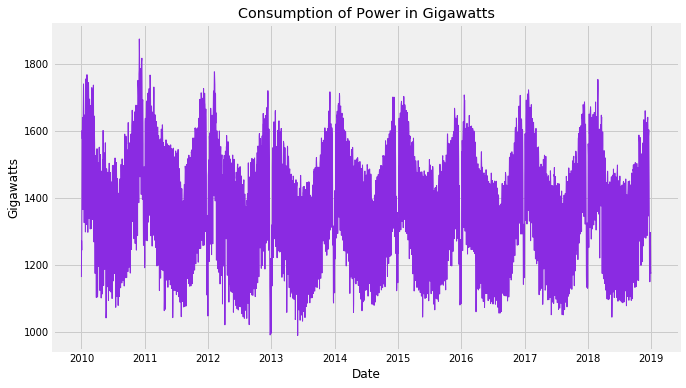

In [68]:
x=final['date']
fig=plt.figure(figsize=(10,6))
plt.plot(x, final['consumption'], lw=1, color=purple)
plt.title("Consumption of Power in Gigawatts")
plt.xlabel('Date')
plt.ylabel('Gigawatts')

We can see clear seasonal swings with high power usage during winter and low power usage during summer. This is because many homes in Germany do not have air conditioning. This clear swing means we should aim to reduce the power usage during the winter when renewables are less efficient.

[Text(0, 0.5, 'Gigawatts'), Text(0.5, 0, 'Date')]

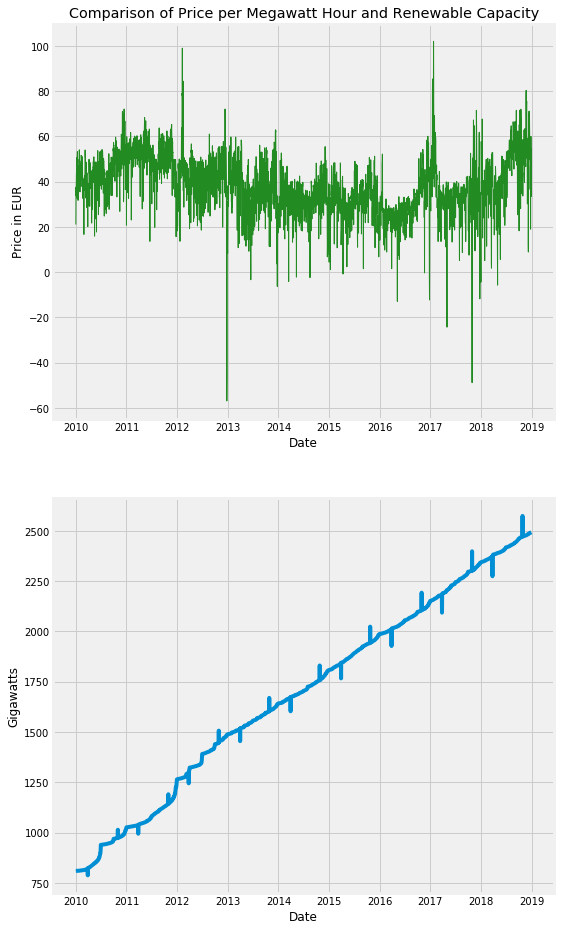

In [53]:
fig=plt.figure(figsize=(8,16))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)

ax1.plot(x, final['price'], lw=1, c=green)
ax1.set(xlabel='Date', ylabel='Price in EUR', title="Comparison of Price per Megawatt Hour and Renewable Capacity")

ax2.plot(x, final['renewable_capacity'])
ax2.set(xlabel='Date', ylabel='Gigawatts')



As we can see, for the incresae in capacity, the price stays realatively consistent. This is promising since inflation would force the price up over time. However, the more lucrative comparison will be actual generation since that would let us know how much is going back into the grid and the price has large day to day fluctuations.

[Text(0, 0.5, 'Gigawatts'), Text(0.5, 0, 'Date')]

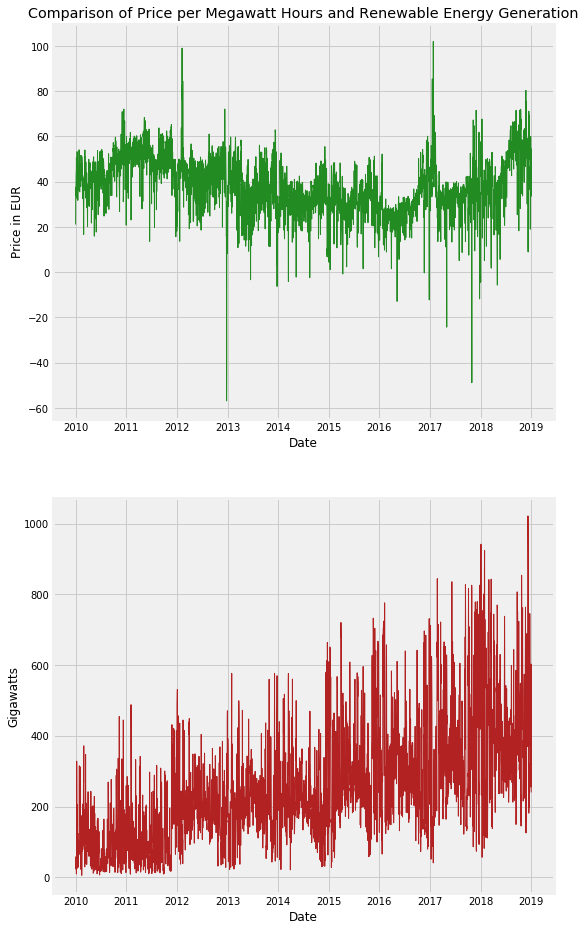

In [54]:
fig=plt.figure(figsize=(8,16))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)

ax1.plot(x, final['price'], lw=1, c=green)
ax1.set(xlabel='Date', ylabel='Price in EUR', title="Comparison of Price per Megawatt Hours and Renewable Energy Generation")

ax2.plot(x, final['renewable_generation'], lw=1, c=red)
ax2.set(xlabel="Date", ylabel="Gigawatts")

When renewables started to come online in 2010, there is a clear decrease in market volitility and an increase in days where the price is zero or negative suggesting that the renewables are putting energy back into the grid. These are promising signs of the power of renewables, but if they can't keep up with the demand of the users then they cannot be the primary source. The primary thing to note is the wide swings in power generatoin, going from more than one thousand gigawatts to less then two hundred gigawatts in 2018 alone. 

Text(0.5, 1.0, 'Comparison of Renewable Generation Ideal and Actual')

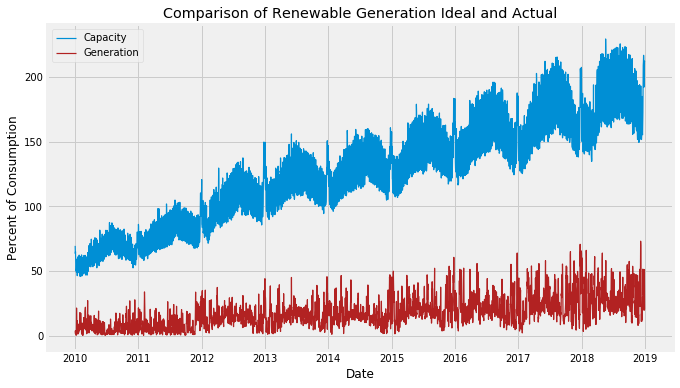

In [56]:
fig=plt.figure(figsize=(10, 6))
plt.plot(x, final['ideal_percent'], lw=1.2, label="Capacity")
plt.plot(x, final['actual_percent'], lw=1.2, label="Generation", c=red)
plt.legend(loc='upper left')
plt.xlabel("Date")
plt.ylabel("Percent of Consumption")
plt.title("Comparison of Renewable Generation Ideal and Actual")


Generally, the realized power generation is much lower than the capacity, additianlly it reaches a consistent high of fifty percent of consumption. THis means we don't yet need to worry about power banking since the consumption is alwasys ahead of the energy renewables can generate.

### Conclusion